In [455]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

##### **Load the Dataset**

In [456]:
data=pd.read_csv('Rotten_Tomatoes_Movies3.csv')

##### **Basic Checks**

In [457]:
# head --> first 5 rows

data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0


In [458]:
# shape --> number of rows and columns

data.shape

(16638, 16)

In [459]:
#info --> data types and missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
dtypes: f

In [460]:
# describe --> summary statistics

data.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16483.000000,16638.000000,16638.000000,16386.000000
mean,102.391494,60.466522,56.607104,60.470829
std,25.028011,28.587230,66.383800,20.462368
min,1.000000,0.000000,5.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000
50%,99.000000,66.000000,28.000000,62.000000
75%,111.000000,86.000000,76.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


In [461]:
# isnull.sum() --> missing values in each column 

data.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

##### **Feature Engineering**

In [462]:
# dropna --> drop missing values

data=data.dropna()

In [463]:
datetime_cols = data.select_dtypes(include=['datetime64[ns]']).columns 
for col in datetime_cols:
    data[col] = data[col].astype(np.int64)

In [464]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

##### **Model Creation using Pipeline**

In [465]:
# Split the data into X and y

X = data.drop('audience_rating', axis=1)
y = data['audience_rating']

In [466]:
# Splitting the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [467]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [468]:
pipe = {
    'LinearRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'DecisionTreeRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('model', DecisionTreeRegressor())
    ]),
    'RandomForestRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor())
    ]),
    'SupportVectorRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR())
    ]),
}

In [469]:
for name,pipeline in pipe.items():
    print(f'Pipeline for {name}:')
    print(pipeline)

Pipeline for LinearRegression:
Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])
Pipeline for DecisionTreeRegressor:
Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor())])
Pipeline for RandomForestRegressor:
Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])
Pipeline for SupportVectorRegressor:
Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])


In [470]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for name, pipeline in pipe.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f'Model: {name}')
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
    r2 = r2_score(y_test, y_pred)
    print(f'R2 Score for {name}: {r2}')
    
    print('\n')
    


Model: LinearRegression
Mean Squared Error: 175.70192885207717
Mean Absolute Error: 10.605604112876623
R2 Score for LinearRegression: 0.538120918066614


Model: DecisionTreeRegressor
Mean Squared Error: 346.65308804204994
Mean Absolute Error: 14.641261498028909
R2 Score for DecisionTreeRegressor: 0.08873049316929904


Model: RandomForestRegressor
Mean Squared Error: 168.77069835742444
Mean Absolute Error: 10.362713534822603
R2 Score for RandomForestRegressor: 0.5563414942347569


Model: SupportVectorRegressor
Mean Squared Error: 179.71417111917845
Mean Absolute Error: 10.678407117325653
R2 Score for SupportVectorRegressor: 0.5275736760019964




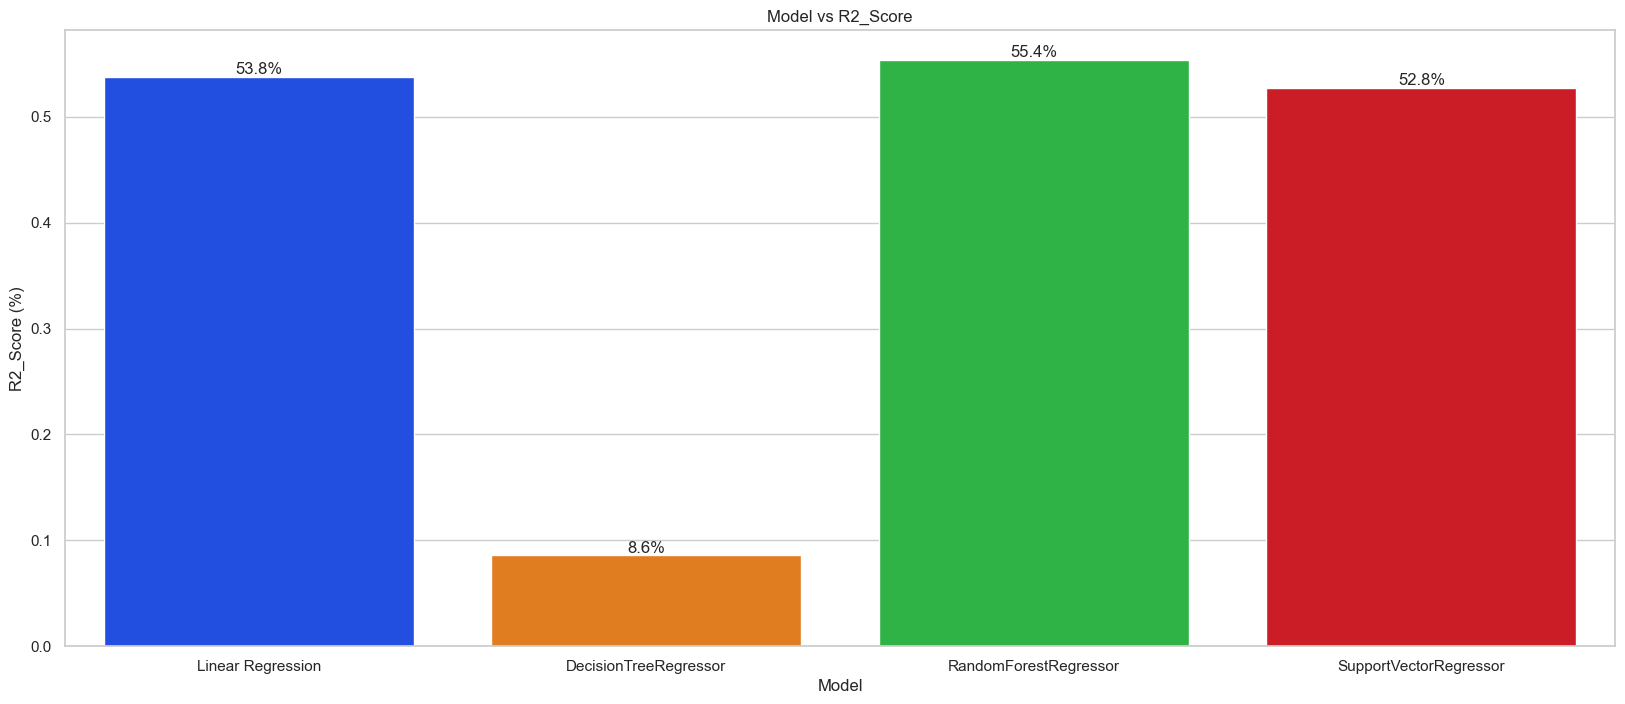

In [471]:
## Visualization

df = pd.DataFrame()
df['Model']=['Linear Regression','DecisionTreeRegressor','RandomForestRegressor','SupportVectorRegressor']
df['R2_Score']=[0.5381, 0.0860, 0.5541, 0.5275]

# Create the plot
plt.figure(figsize=(20, 8))
sns.set(style='whitegrid')

# Barplot
bar_plot = sns.barplot(x='Model', y='R2_Score', data=df, palette='bright')

# Add text annotations
for p in bar_plot.patches:
    percentage = '{:.1f}%'.format(p.get_height() * 100)  # Convert to percentage
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),  # 5 points vertical offset
                      textcoords='offset points')

# Add titles and labels
plt.title('Model vs R2_Score')
plt.ylabel('R2_Score (%)')
plt.xlabel('Model')
plt.show()


Based on the R2 score, **Random Forest Regressor** appears to be the most promising algorithm for this dataset. 

It achieves an **R2 score of 55.4%**, which indicates that it explains a significant portion of the variance in the target variable.

In [472]:
# Hyperparameter tuning for RandomForestRegressor

param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [5,10,15],
    'min_samples_split': [2,5,10],
}
    

In [473]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}


In [474]:
# Final model with best parameters

best_model_rf=grid_search.best_estimator_
y_predict=best_model_rf.predict(X_test)

print(f'Mean Squared Error:{mean_squared_error(y_test,y_predict)}')
print(f'Mean Absolute Error:{mean_absolute_error(y_test,y_predict)}')
print(f'R2 Score:{r2_score(y_test,y_predict)}')


Mean Squared Error:167.22426998442035
Mean Absolute Error:10.329569028269582
R2 Score:0.5604066910249423


In [475]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(**grid_search.best_params_,random_state=42))
])

In [476]:
pipe_rf.fit(X_train,y_train)
final_pred=pipe_rf.predict(X_test)
print('Pipeline for RandomForestRegressor score:',r2_score(y_test,final_pred))

Pipeline for RandomForestRegressor score: 0.5603064394504134
